# Visualizing Data for Regression

In this lab, you will learn how to use R to **visualize and explore data**. This process is also known as **exploratory data analysis**. 

Before creating analytical models, a data scientist must develop an understanding of the properties and relationships in a dataset. There are two goals for data exploration and visualization. First to understand the relationships between the data columns. Second to identify features that may be useful for predicting labels in machine learning projects. Additionally, redundant, collinear features can be identified. Thus, visualization for data exploration is an essential data science skill.
In this lab you will explore two datasets.

Specifically, in this lab, your first goal is to explore a dataset that includes information about automobile pricing. In other labs you will use what you learn through visualization to create a solution that predicts the price of an automobile based on its characteristics. This type of predictive modeling, in which you attempt to predict a real numeric value, is known as **regression**; and it will be discussed in more detail later in the course. For now, the focus of this lab is on visually exploring the data to determine which features may be useful in predicting automobile prices.

This lesson is divided into several parts. In each part you will learn how to use the visualization tools available in Python to explore complex data. Specifically you will learn:

- **Summarizing and manipulating data**:
  * How large is it?
  * What columns are of interest?
  * What are the characteristics of the data derived from summary statistics and counts?
- **Developing multiple views of complex data** using multiple chart types. Exploring complex data requires multiple views to understand the many relationships. It is impossible to develop a complete understanding from just a few plots.
- **Overview of plotting with ggplot2** a powerful and flexible R plotting packages. 
- **Overview of univariate plot types** is a review of creating these basic plots using ggplot2. These plot types allow you to study the distributional properties of the variables in your data set. 
- **Overview of two dimensional plot types** is a review of creating basic plot types used to construct visualizations. These plots naturally display the relationship between two variables on the 2-d computer graphics display. 
- **Using Aesthetics** is an overview of how to project additional plot dimensions using plot aesthetics. Using aesthetics provides a method for projecting additional dimensions onto the 2-d computer graphics display. 
- **Faceted plotting** also know as conditioned plotting or lattice plotting, introduces a powerful method for visualizing higher dimensional data. Arrays of plots of subsets of the data are arranged on the 2-d computer graphics display. 

## Load the dataset

Before you can start visualization, you must load the dataset. The code in the cell below loads the data and performs some data cleaning. You will work though data cleaning and preparation methods in other labs. 

As a first step execute the code in the cell below to import the R packages you will need for the rest of this network. Execute this code 

> **Note:** If you are running in Azure Notebooks, make sure that you run the code in the `setup.ipynb` notebook at the start of you session to ensure your environment is correctly configured. 

In [1]:
## Import packages
library(ggplot2)
library(repr)
library(hexbin)
library(GGally) ## Adds pair-wise scatter plots to ggplot2
options(repr.plot.width=4, repr.plot.height=4) # Set the initial plot area dimensions

Warning message:
"package 'ggplot2' was built under R version 3.5.1"Warning message:
"package 'repr' was built under R version 3.5.1"Warning message:
"package 'hexbin' was built under R version 3.5.1"Warning message:
"package 'GGally' was built under R version 3.5.1"

The code in the cell below to loads and prepare the automotive price dataset. Notice that `read.csv` uses the `stringsAsFactors = FALSE` argument to ensure string variables remain as spring. Execute this code.

In [2]:
read.auto = function(file = 'Automobile price data _Raw_.csv'){
    ## Read the csv file
    auto.price <- read.csv(file, header = TRUE, stringsAsFactors = FALSE)

    
    numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
    for(col in numcols){
        temp = auto.price[,col]
        auto.price[,col] = ifelse(temp == '?', NA, auto.price[,col])
    }
    
    ## Coerce some character columns to numeric
    auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)

    ## Remove cases or rows with missing values. In this case we keep the 
    ## rows which do not have nas. 
    auto.price = auto.price[complete.cases(auto.price[, numcols]), ]
    
    ## Drop some unneeded columns
    auto.price[,'symboling'] = NULL
    auto.price[,'normalized.losses'] = NULL
    
    return(auto.price)
}
auto_prices = read.auto()
colnames(auto_prices)

[1] "make"              "fuel.type"         "aspiration"       
 [4] "num.of.doors"      "body.style"        "drive.wheels"     
 [7] "engine.location"   "wheel.base"        "length"           
[10] "width"             "height"            "curb.weight"      
[13] "engine.type"       "num.of.cylinders"  "engine.size"      
[16] "fuel.system"       "bore"              "stroke"           
[19] "compression.ratio" "horsepower"        "peak.rpm"         
[22] "city.mpg"          "highway.mpg"       "price"

Notice the column names. Most of these names are human interpretable and give you an idea of the information in this dataset. The `price` column is the **label**, the variable you are trying to predict. 

## Exploring the data

With the dataset loaded, you will now explore some basic properties using summary methods. 

First, you will examine the head (first few rows) of the data frame to gain an idea of the contents by executing  the code in the cell below

In [3]:
head(auto_prices)

make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,length,width,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Scroll across and examine the contents of each column in this dataset. Some columns have **numeric values** and other columns contain **strings variables**. Some of the numeric columns appear to contain **integer values** and other have **floating point numbers**. In machine learning we treat the string columns as **categorical variables**. 

To better understand the data types in this dataset execute the code in the cell below to print the types and the first few values of each column.

In [4]:
str(auto_prices)

'data.frame':	195 obs. of  24 variables:
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.of.cylinders : chr  "four" "four" "six" "four" ...
 $ engine.size      : int  130 130 152 109 136 136

These results confirm the earlier operations.  

Execute the code in the cell below to print a summary of the columns of the data frame and examine the results.

In [5]:
summary(auto_prices)

     make            fuel.type          aspiration        num.of.doors      
 Length:195         Length:195         Length:195         Length:195        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
  body.style        drive.wheels       engine.location      wheel.base   
 Length:195         Length:195         Length:195         Min.   : 86.6  
 Class :character   Class :character   Class :character   1st Qu.: 94.5  
 Mode  :character   Mode  :character   Mode  :character   Median : 97.0  
                                                          Mean   : 98.9  
                                                          3rd Qu.:102.4  
                 

There is a lot of information here for the numeric columns. For each column the following is printed:
-  The count of the cases in the column. In this case, all counts are the same. 
- The mean and standard deviation of the values in the column. Notice that there is a wide range of mean values across these columns. 
- The minimum and maximum of the values in the column. Again, the extreme range of these columns varies quite a lot. 
- The quartiles are displayed, 1st Quantile (25%), median value (50%), and 3rd Quantile (75%). For many of these columns, such as curb_weight and the label value, price, there is a significant difference between the mean and the median values. When the median value is less than the mean, this indicates that the distribution is right-skewed, that is, with a tail stretching toward the right.

Summary does not compute standard deviation. Execute the code in the cell below to compute and print the standard deviation of the numeric columns.

In [6]:
for(col in colnames(auto_prices)){
    if(is.numeric(auto_prices[,col])){
        cat(paste(col, as.character(round(sd(auto_prices[,col]), 2)), '\n'))
    }
}

wheel.base 6.13 
length 12.48 
width 2.13 
height 2.4 
curb.weight 524.72 
engine.size 41.43 
bore 0.27 
stroke 0.31 
compression.ratio 4.06 
horsepower 37.87 
peak.rpm 468.27 
city.mpg 6.4 
highway.mpg 6.83 
price 8056.33 


You can see there is a wide range of scale for these numeric variables. 

Now, you will consider how you can understand the distributions of categorical variables. A single line of code computes and displays a **frequency table** using the R `table` function. A frequency table shows the frequency of each unique category of a categorical variable.  

The code in the cell prints frequency table for a each categorical column. The `is.character` function is used to identify the categorical (character) variables. Execute this code and examine the results.

In [7]:
for(col in colnames(auto_prices)){
    if(is.character(auto_prices[, col])){
        cat('\n')
        cat(paste('Frequency table for', col))
        print(table(auto_prices[, col]))
    }    
}


Frequency table for make
  alfa-romero          audi           bmw     chevrolet         dodge 
            3             6             8             3             9 
        honda         isuzu        jaguar         mazda mercedes-benz 
           13             2             3            13             8 
      mercury    mitsubishi        nissan        peugot      plymouth 
            1            13            18            11             7 
      porsche          saab        subaru        toyota    volkswagen 
            4             6            12            32            12 
        volvo 
           11 

Frequency table for fuel.type
diesel    gas 
    20    175 

Frequency table for aspiration
  std turbo 
  159    36 

Frequency table for num.of.doors
   ? four  two 
   2  112   81 

Frequency table for body.style
convertible     hardtop   hatchback       sedan       wagon 
          6           8          63          94          24 

Frequency table for drive.wheels
4wd

There are some basic facts you can derive from these frequency tables. 
1. Some of these variables have a large number of categories. When performing machine learning with a limited size training dataset, having a large number of categories is problematic, since there will be few samples per category. For example, notice how many auto makes are represented. There is only 1 Mercury and 2 Isuzus. Thus, any statistical property for these categories will be poorly determined. 
2. There are significant imbalances in the counts of some categories. You have already seen that there are significant differences in the counts of autos by make. As another example, there are only 3 cars with rear engine autos. Again, any statistical property of rear engine cars will be poorly determined.
3. Some categorical variables could reasonably converted to numeric variables. For example, the number of cylinders is currently a categorical variable, but could be transformed to a numeric variable. 

***
**Note:** There are two other cases to consider with the transformations between numeric and categorical variables.
1. Some categorical variables indicate rank, for example large, medium and small. In these cases, it may be better to transform these values to numeric levels.
2. Just as it might be useful to transform a categorical variable to numeric, it may be advantageous to convert a numeric variable to a categorical variable. This is particularly the case if the numeric values are simply coding for a category with no particular meaning.  
***

## Visualizing Automobile Data for Regression
The R ggplot2 package provides extensive graphical capabilities. Ggplot2 abstracts many low level plotting details and allows you to create high quality plots with minimal coding. These features make ggplot2 a powerful package to create visualizations of your data when exploring relationships between the data features.  Further, you can identify features that may be useful for predicting labels in machine learning projects.

## Visualizing distributions

With some basic understanding of the data set in mind, it is time to dig a bit deeper. In this section you will apply methods to explore the distributions of categorical and numeric data.

### Bar charts

As a first step, you will use **bar charts** to examine the frequency distributions of categorical variables. A bar chart displays frequencies of each category. 

Execute the function in the cell below to perform the following processing:
1. Iterates over the list of columns.
2. A filter is applied to find character (categorical) columns. 
3. The bar plot is created using the ggpot2 `geom_bar` plot type. 

Notice the use of `aes_string` to specify a column as a string variable. In addition, the `print` function is used to display the plot from inside the function. If this is not done, no plot will be displayed. 

Execute this code and examine the results.

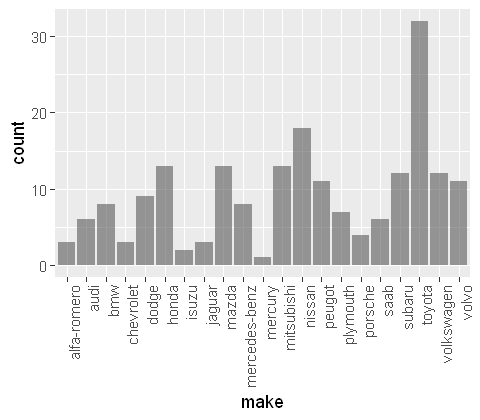

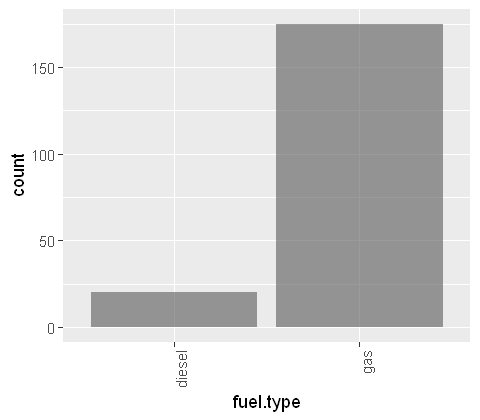

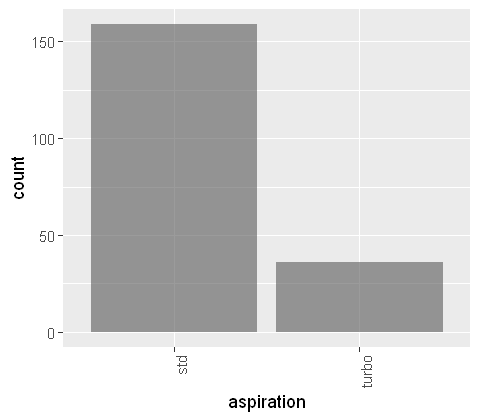

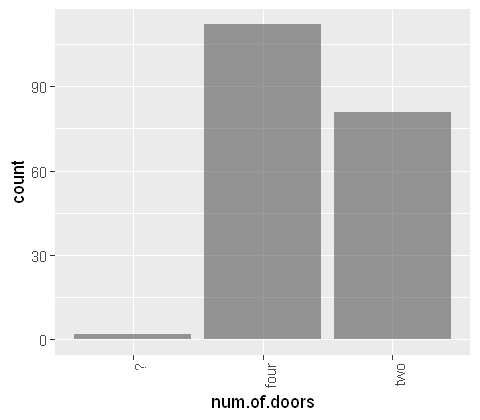

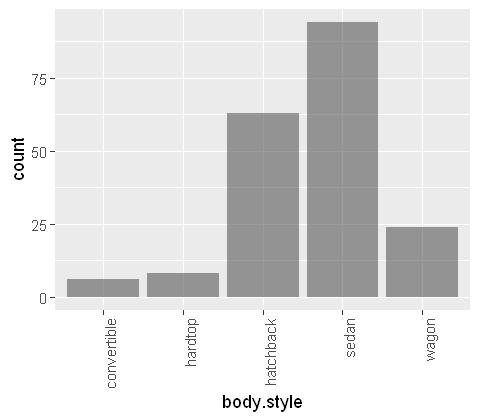

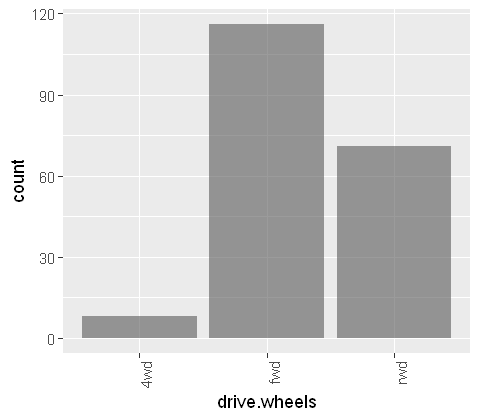

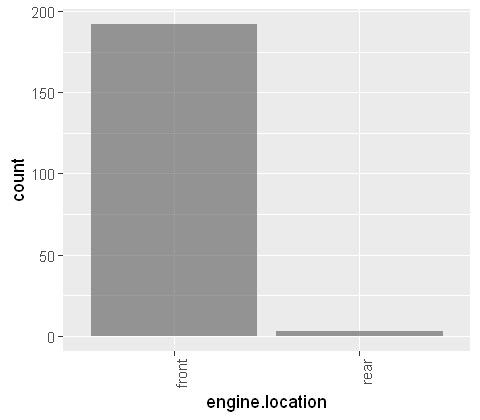

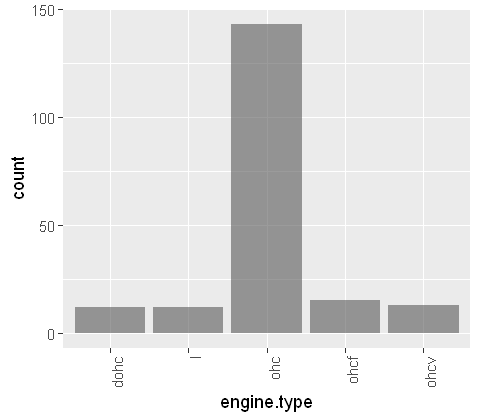

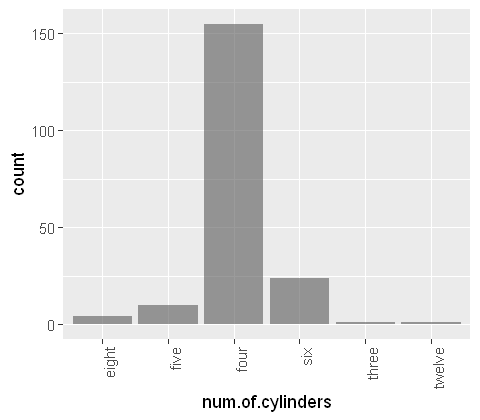

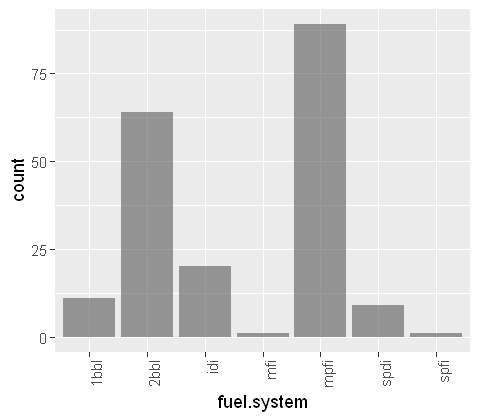

In [8]:
plot_bars = function(df){
    options(repr.plot.width=4, repr.plot.height=3.5) # Set the initial plot area dimensions
    for(col in colnames(df)){
        if(is.character(df[,col])){
            p = ggplot(df, aes_string(col)) + 
                       geom_bar(alpha = 0.6) + 
                       theme(axis.text.x = element_text(angle = 90, hjust = 1))
            print(p)
        }
    }
}

plot_bars(auto_prices)

These plots show the wide range of frequencies for the categorical variables plotted. This will be a problem with modeling, as there are so few members of some classes. 

### Histograms

**Histograms** are related to bar plots. Whereas, a bar plot shows the counts of unique categories, a histogram shows the **number of data values within a bin** for a **numeric variable**. The bins divide the values of the variable into equal segments. The vertical axis of the histogram shows the count of data values within each bin.  

The code below follows the same basic recipe used for the bar plot to create a histogram. In this case, the ggplot2 `geom_hist` method is used. 

Execute this code, examine the results, and answer **Question 1** on the course page.

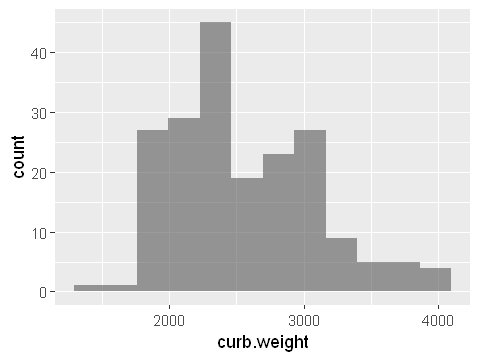

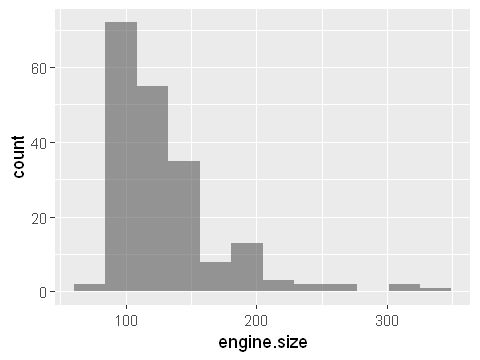

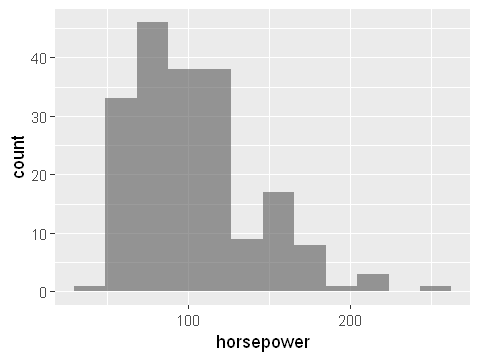

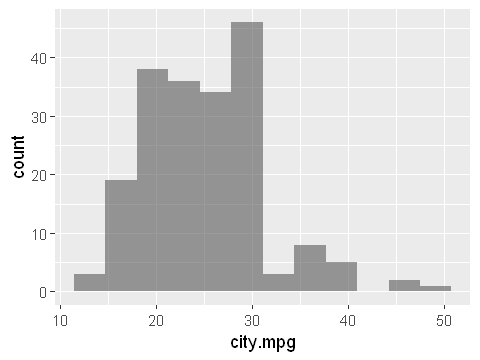

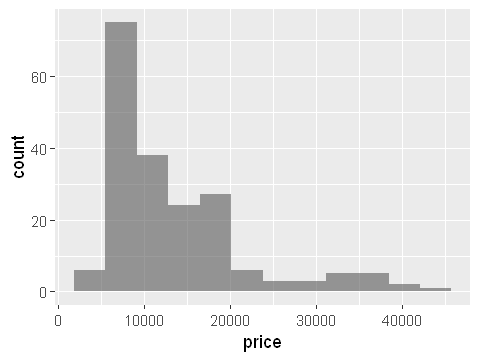

In [9]:
plot_hist = function(df, numcols, bins = 10){
    options(repr.plot.width=4, repr.plot.height=3) # Set the initial plot area dimensions
    for(col in numcols){
        if(is.numeric(df[,col])){
            bw = (max(df[,col]) - min(df[,col]))/(bins + 1)
            p = ggplot(df, aes_string(col)) + 
                       geom_histogram(alpha = 0.6, binwidth = bw) 
            print(p)
        }
    }
}

numcols = c('curb.weight', 'engine.size', 'horsepower', 'city.mpg', 'price')
plot_hist(auto_prices, numcols)

Some of these variables have distributions that are right-skewed, or skewed to the right side. This skewed distribution will affect the statistics of any machine learning model.

### Kernel density plots 

**Kernel density estimation** or **kde** plots are similar in concept to a histogram. A kernel density plot displays the values of a smoothed density curve of the data values. In other words, the kernel density plot is a smoothed version of a histogram.
 
The code in the cell below creates a kernel density plot following the recipe used before. There is one other addition, a 'rug', which shows the location of the data points is added.

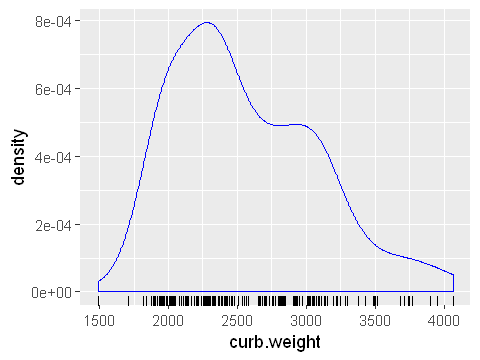

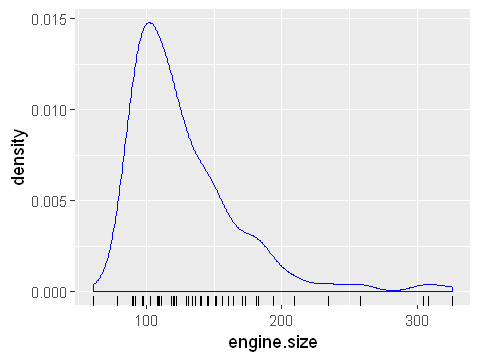

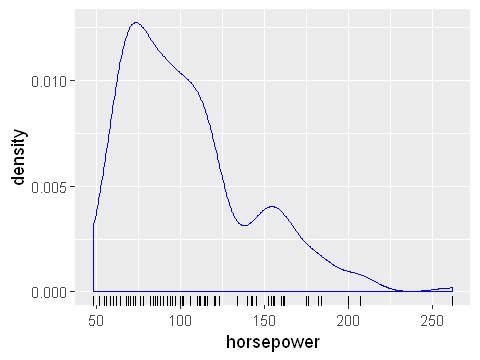

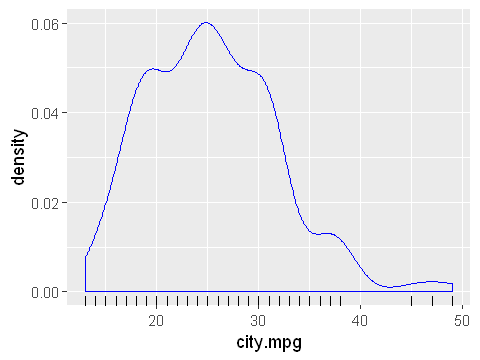

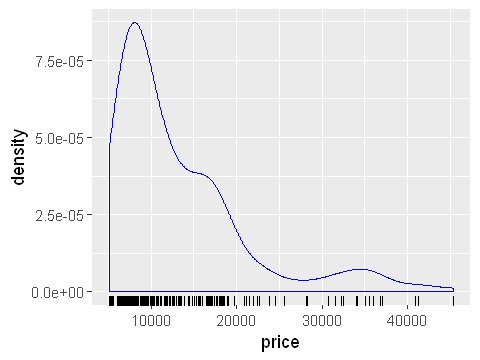

In [10]:
plot_dist = function(df, numcols){
    options(repr.plot.width=4, repr.plot.height=3) # Set the initial plot area dimensions
    for(col in numcols){
        if(is.numeric(df[,col])){
            p = ggplot(df, aes_string(col)) + 
                       geom_density(color = 'blue') +
                       geom_rug()
            print(p)
        }
    }
}

plot_dist(auto_prices, numcols)

The kde plots show the same skewness properties of the histogram. The rug shows a different view of the density of the data points on the axis. Some details are more evident in this view.  

### Combine histograms and kdes

Combining a histogram and a kde can highlight different aspects of a distribution. This is easy to do with ggplot2, as the code below demonstrates. In this case, the number of bins for the histogram has been increased from 10 to 20. 

Execute this code, examine the results, and answer **Question 2** on the course page.

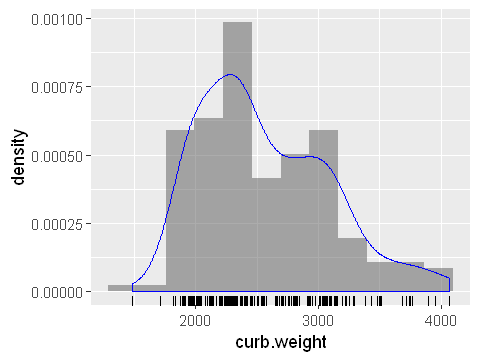

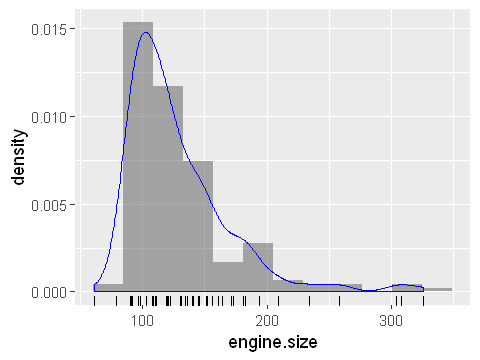

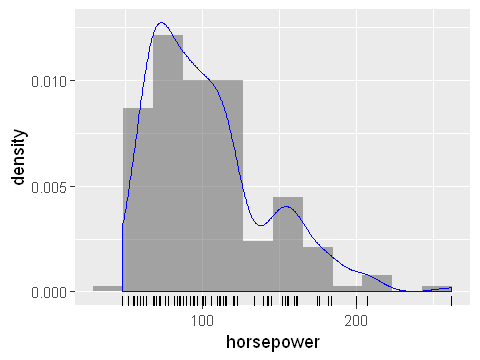

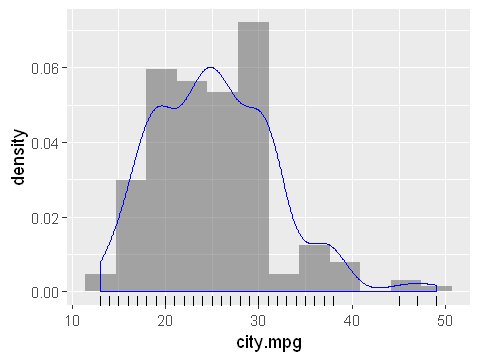

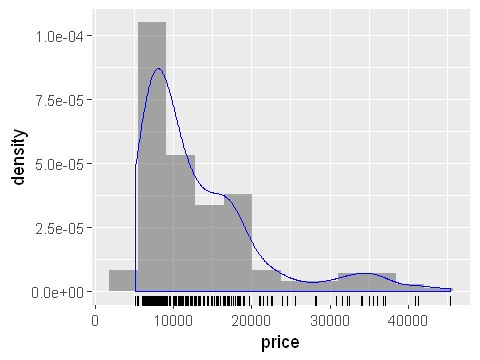

In [11]:
plot_hist_dens = function(df, numcols, bins = 10){
    options(repr.plot.width=4, repr.plot.height=3) # Set the initial plot area dimensions
    for(col in numcols){
        if(is.numeric(df[,col])){
            bw = (max(df[,col]) - min(df[,col]))/(bins + 1)
            p = ggplot(df, aes_string(col)) + 
                       geom_histogram(binwidth = bw, aes(y=..density..), alpha = 0.5) +
                       geom_density(aes(y=..density..), color = 'blue') + 
                       geom_rug()
            print(p)
        }
    }
}

plot_hist_dens(auto_prices, numcols)    

This view highlights the fact that curb weight and city MPG are multi-modal distributions. This fact, will have implications for the statistics of any machine learning model trained with these data.

## Two dimensional plots

Having used summary statistics and several one dimensional plot methods to explore data, you will continue this exploration using **two dimensional plots**. Two dimensional plots help you develop an understanding  of the **relationship between two variables**. For machine learning, the relationship of greatest interest is between the **features** and the **label**. It can also be useful to examine the relationships between features to determine if the features are co-variate or not. Such a procedure can prove more reliable than simply computing correlation when the relationship is nonlinear. 

### Create Scatter Plots

Scatter plots are widely used to examine the relationship between two variables. In this case, the plots created are of some features vs. the label, price of the auto. 

The code in the cell below follows the previously used recipe for using the ggplot2 `geom_scatter` function. Execute this code and examine the results.

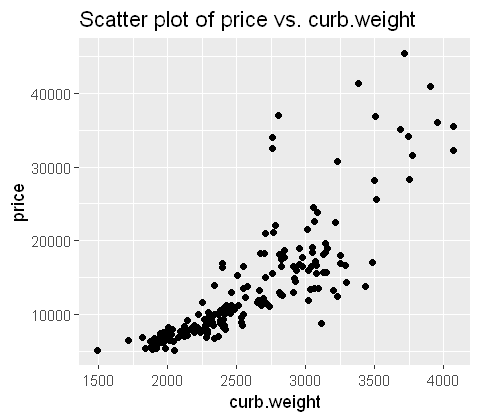

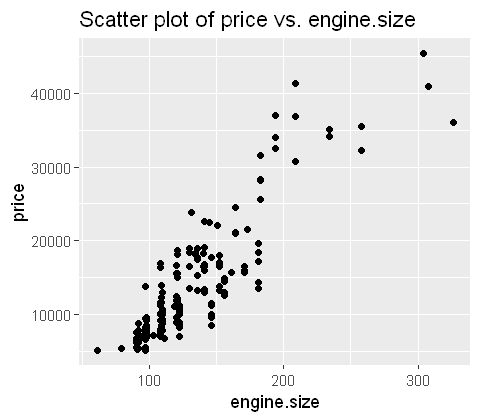

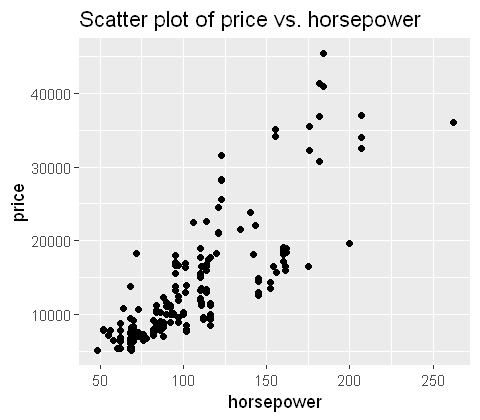

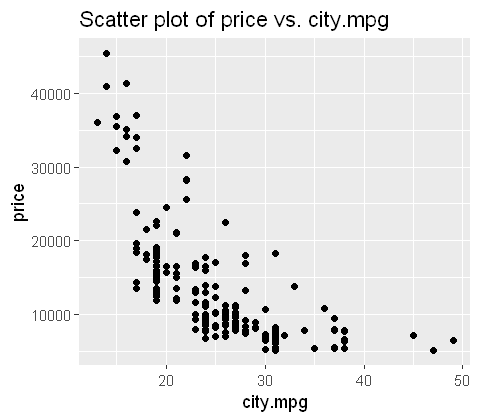

In [12]:
plot_scatter = function(df, cols, col_y = 'price'){
    options(repr.plot.width=4, repr.plot.height=3.5) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(col, col_y)) + 
                   geom_point() +
                   ggtitle(paste('Scatter plot of', col_y, 'vs.', col))
        print(p)
    }
}

numcols = c('curb.weight', 'engine.size', 'horsepower', 'city.mpg')
plot_scatter(auto_prices, numcols)

These plots show a strong relationship between these features and the label. It is likely these features will be useful in predicting the price of autos. Engine size and horsepower have fairly linear relationships with price, whereas curb weight and especially city MPG do not. 

It seems likely that horsepower and engine size are collinear. To test this hypothesis execute the code in the cell below and examine the result.

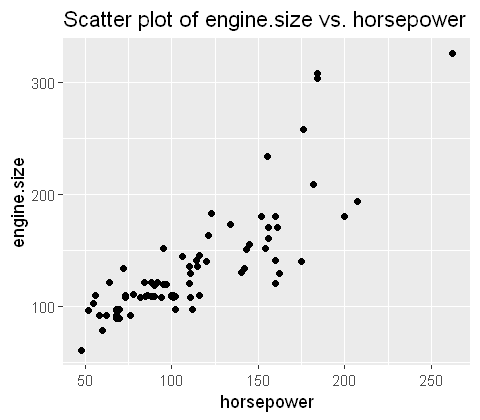

In [13]:
plot_scatter(auto_prices, c('horsepower'), 'engine.size') 

Indeed these features do appear linearly dependent. Therefore, you will not want to use them in the same machine learning model. 

### Deal with overplotting

Examine the engine size or city MPG vs price above. Notice, that for certain engine sizes and city MPG ratings there are numerous autos in a narrow price range. Apparently, auto manufactures target these characteristics. The result is that many points are plotted one over the other on the scatter plots, resulting in **over plotting**. Over plotting is a serious problem when scatter plots are applied to large datasets. Serious over plotting can render a plot meaningless or uninterpretable. 

Fortunately, there are several good ways to deal with over plotting:
1. Use **transparency** of the points to allow the view to see though points. With mild over plotting this approach can be quite effective.
2. **Contour plots** or **2d density plots** show the density of points, such as a topographic map shows elevation. Generating the contours has high computational complexity and making this method unsuitable for massive datasets.
3. **Hexbin plots** are the two-dimensional analog of a histogram. The density of the shading in the hexagonal cells indicates the density of points. Generating hexbins is computationally efficient and can be applied to massive datasets.

The code in the cell below modifies the scatter plot function used previously to add a transparency argument. In statistical graphics alpha, the inverse of transparency is specified; alpha = 1.0 is opaque, alpha = 0.0 is perfectly transparent. The code in the cell below uses low alpha of 0.2 (high transparency). Execute this code and examine the results. 

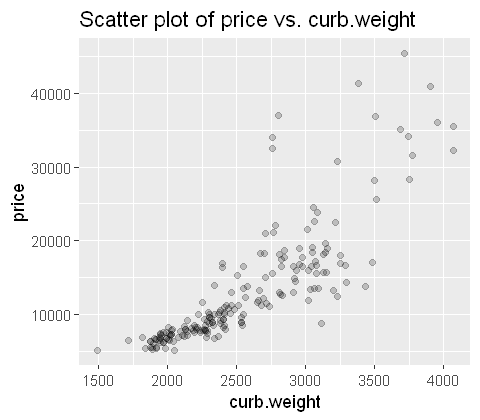

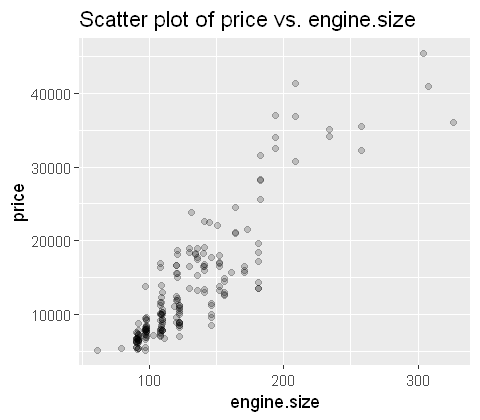

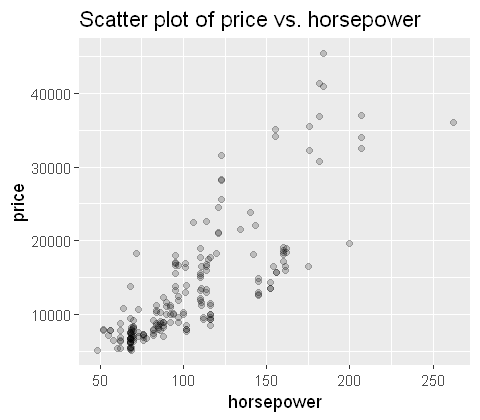

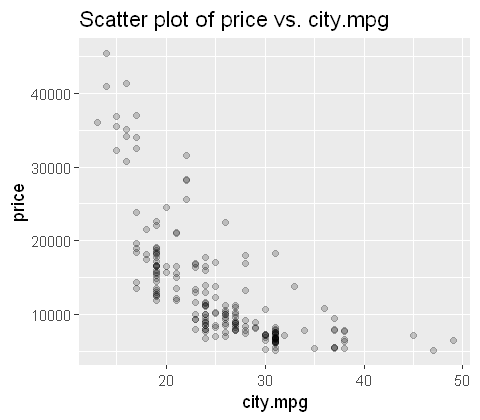

In [14]:
plot_scatter_t = function(df, cols, col_y = 'price', alpha = 1.0){
    options(repr.plot.width=4, repr.plot.height=3.5) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(col, col_y)) + 
                   geom_point(alpha = alpha) +
                   ggtitle(paste('Scatter plot of', col_y, 'vs.', col))
        print(p)
    }
}

plot_scatter_t(auto_prices, numcols, alpha = 0.2)

With the high transparency it is now possible to see though points in dense areas to get a better view of the data. 

Using transparency for over-plotting is useful, but limited. With large number of points, you will need other methods. Using contour or 2d density plots is one such solution. The code in the cell below uses the `geom_density_2d` function from ggplot2 to display a contour plot of point density. The points are also displayed with `geom_scatter` as before. Execute this code and examine the results.

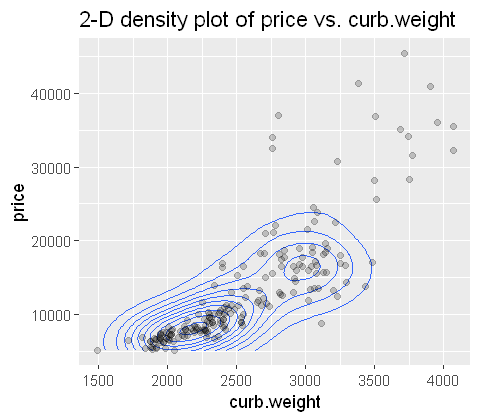

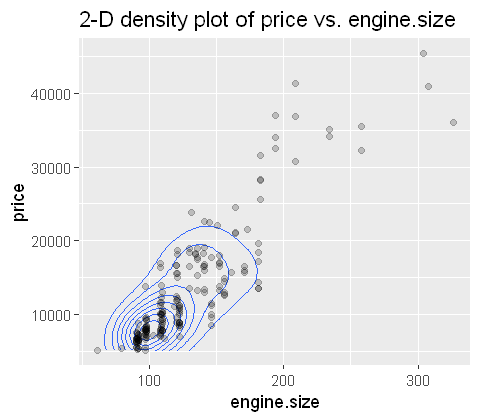

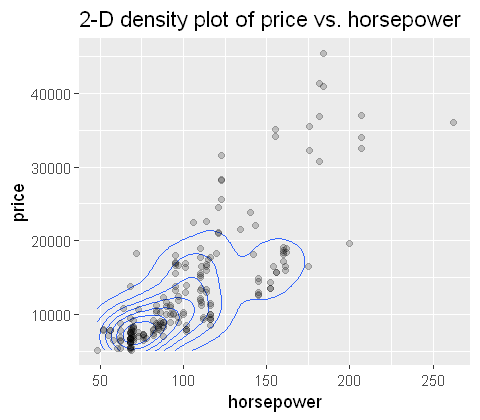

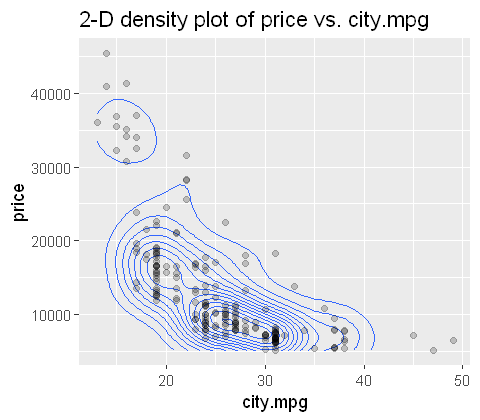

In [15]:
plot_2density = function(df, cols, col_y = 'price', alpha = 1.0){
    options(repr.plot.width=4, repr.plot.height=3.5) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(col, col_y)) + 
                   geom_density_2d() +
                   geom_point(alpha = alpha) +
                   ggtitle(paste('2-D density plot of', col_y, 'vs.', col))
        print(p)
    }
}

plot_2density(auto_prices, numcols, alpha = 0.2)

These density contour plots show quite a different view of the relationship between these features and the label. In particular, 2d multi-modal behavior is visible for curb weight, horsepower and particularly city MPG. 

The code in the cell below displays the 2d hexbin plots and 1d histograms for the same variables. Execute this code and examine the results.

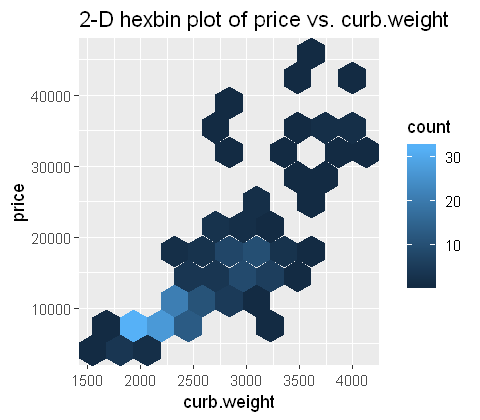

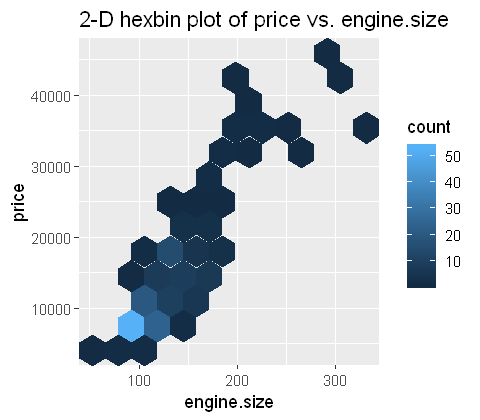

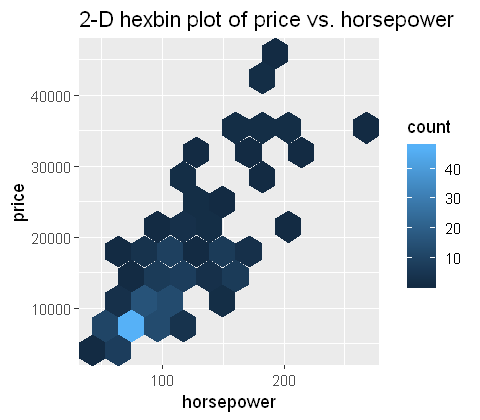

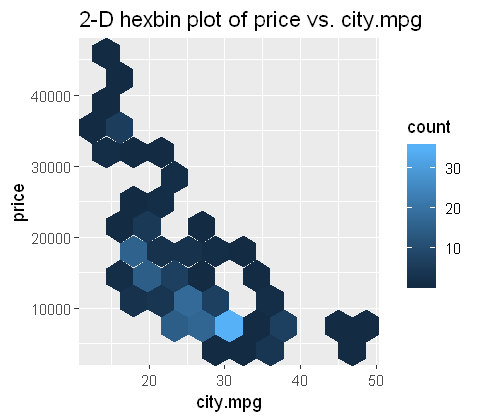

In [16]:
plot_hex = function(df, cols, col_y = 'price', bins = 30){
    options(repr.plot.width=4, repr.plot.height=3.5) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(col, col_y)) + 
                   geom_hex(show.legend = TRUE, bins = bins) +
                   ggtitle(paste('2-D hexbin plot of', col_y, 'vs.', col))
        print(p)
    }
}

plot_hex(auto_prices, numcols, bins = 10)

The overall impression from the hexbin plot approximately the same as for the contour plots. A bit more detail is visible since cells with as few as 1 point are displayed. 

### Relation between categorical and numeric variables

You have created 2d plots of numeric variables But, what can you do if some of the features are categorical variables? There are two plot types specifically intended for this situation:
1. **Box plots** which highlight the quartiles of a distribution. Not surprisingly, the box plot contains a box. The range of the **inner two quartiles** are contained within the box. The length of the box shows the **interquartile range**. A line within the box shows the median. **Whiskers** extend for the maximum of 1.5 times the interquartile range or the extreme value of the data. Outliers beyond the whiskers are shown in a symbol. 
2. **Violin plots** which are a variation on the 1d KDE plot. Two back to back KDE curves are used to show the density estimate. 

Box plots and violin plots can be arranged side by side with data of the numerical variable grouped by the categories of the categorical variable. In this way each box or violin display represents the value of the numeric variable for cases of each category of the categorical variable.

Execute the code in the cell below to display box plots for the list of categorical variables, and examine the results. 

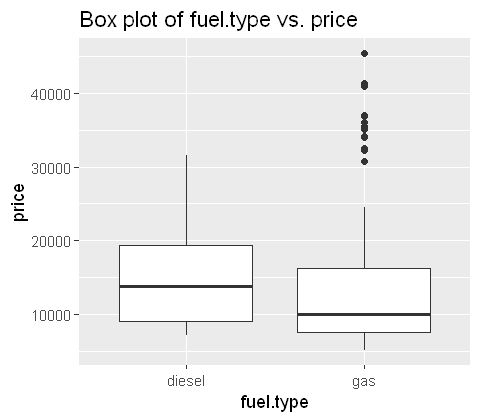

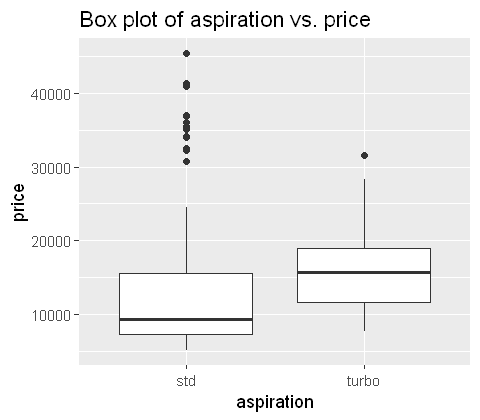

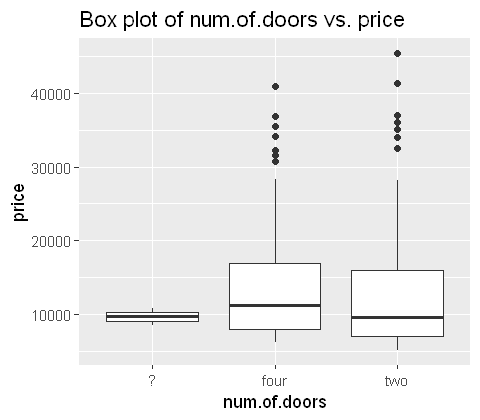

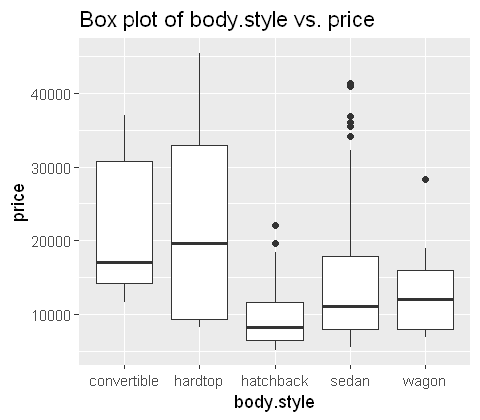

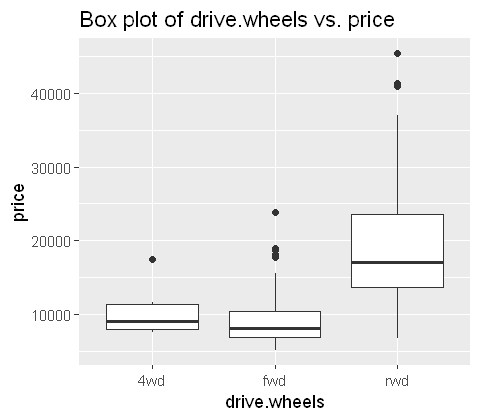

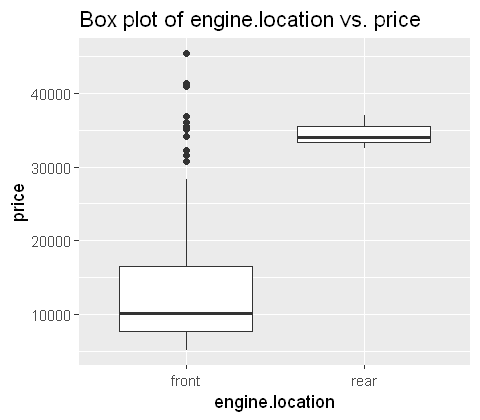

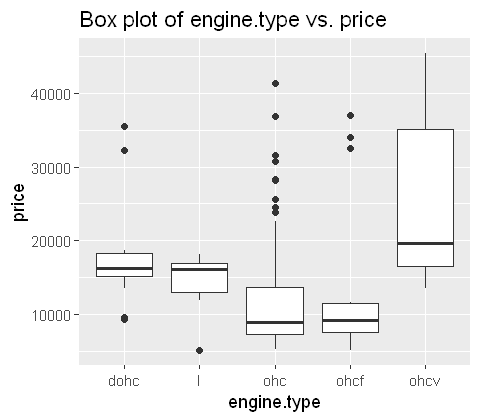

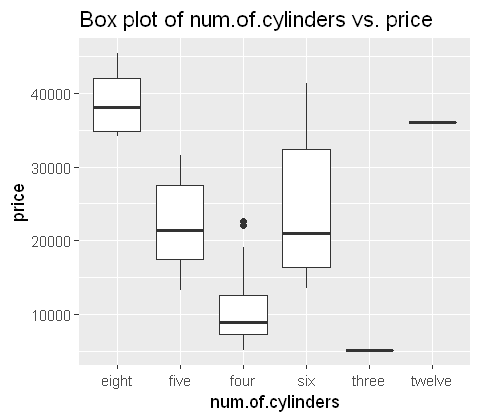

In [17]:
plot_box = function(df, cols, col_y = 'price'){
    options(repr.plot.width=4, repr.plot.height=3.5) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(col, col_y)) + 
                   geom_boxplot() +
                   ggtitle(paste('Box plot of', col, 'vs.', col_y))
        print(p)
    }
}

cat_cols = c('fuel.type', 'aspiration', 'num.of.doors', 'body.style', 
            'drive.wheels', 'engine.location', 'engine.type', 'num.of.cylinders')
plot_box(auto_prices, cat_cols)  

For each categorical variable, you can see that a box plot is created for each unique category. Notice that for some of these cases, there are some noticeable differences between the price of autos by category. For example, for fuel type or aspiration there are noticeable differences. In other cases, such as number of doors, the differences do not appear significant. For number of cylinders there are significant differences, but there are two categories with only one case, which is problematic. 

The code in the cell below creates a similar display as above using violin plots. Execute the code and examine the results. 

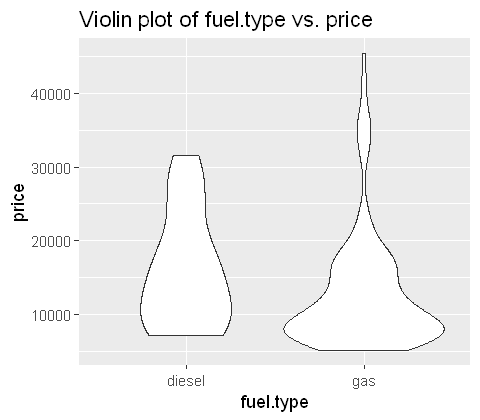

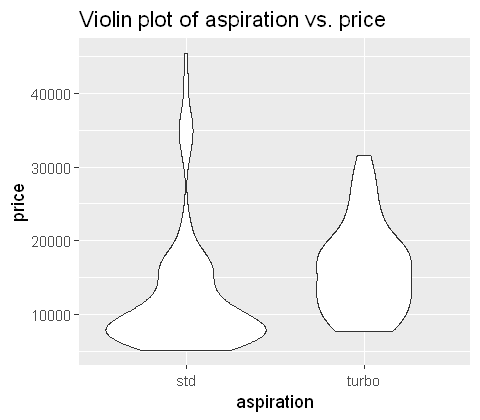

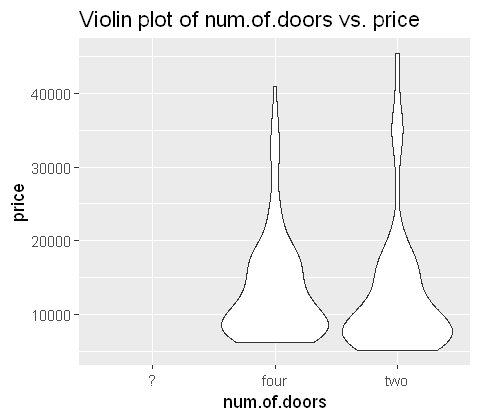

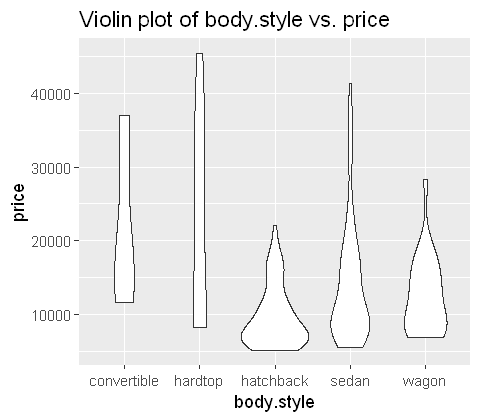

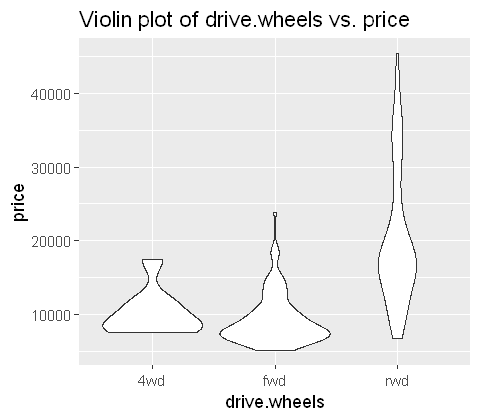

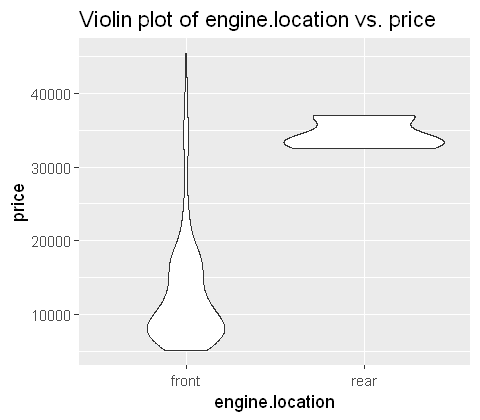

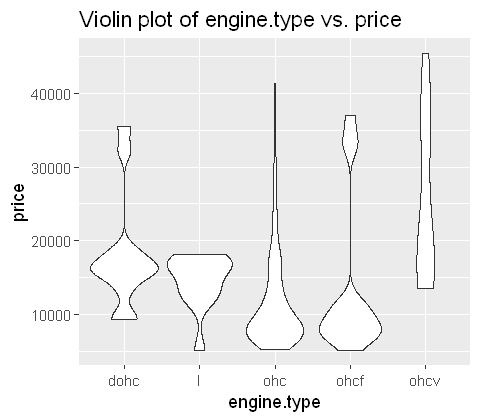

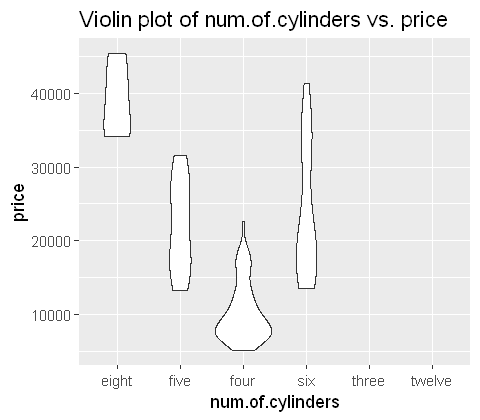

In [18]:
plot_violin = function(df, cols, col_y = 'price', bins = 30){
    options(repr.plot.width=4, repr.plot.height=3.5) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(col, col_y)) + 
                   geom_violin() +
                   ggtitle(paste('Violin plot of', col, 'vs.', col_y))
        print(p)
    }
}

plot_violin(auto_prices, cat_cols)  

The interpretation of the violin plots is similar to the box plots. However, a bit more detail of the distributions is visible. The area of each violin is the same on each plot display. Notice also that a type of box plot is visible inside each violin plot. 

As you examine the above plots notice that some relationships are more obvious. For example, it quite clear that the number of doors does not affect the price of the car and the body style as marginal influence at best. Whereas, engine location and number of cylinders does affect price.  

## Use aesthetics to add project additional dimensions

Up until now, you have work with one or two variables on a single plot. But, with complex datasets it is useful to view multiple dimensions on each plot. The question is, how can this be done when graphics displays are limited to two dimensions? 

In this section, plot aesthetics are used to project additional dimensions. Some aesthetics are useful only for categorical variables, while others are useful for numeric variables. Keep in mind that not all plot aesthetics are equally effective. Tests of human perceptions have shown that people are very good as noticing small differences in position. This fact explains why scatter plots are so effective. In rough order of effectiveness these aesthetics are:
1. **Marker shape** is an effective indicator variable category. It is critical to select shapes which are easily distinguished by the viewer. 
2. **Marker size** shows values of a numeric variable. Be careful, as size is the span across the marker, not the area. 
3. **Marker color** is useful as an indicator of variable category. Color is the least effective of these three aesthetics in terms of human perception. Colors should be chosen to appear distinct. Additionally, keep in mind that many people, particularly men are red-green color blind. 

Categorical aesthetics, such as marker shape and color, are only effective if the differences in markers are perceptible. Using too many shapes or color creates a situation where the viewer cannot tell the differences between the categories. Typically a limit of about five to seven categories should be observed. 


### Marker shape

The code in the cell below uses marker shape to show the fuel type of the auto on a scatter plot. Notice that the `shape` aesthetic must be wrapped in the  `factor` function inside a call to `aes`. Execute this code and examine the result. 

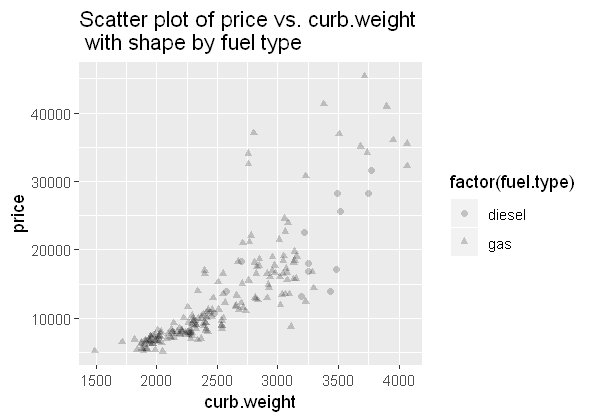

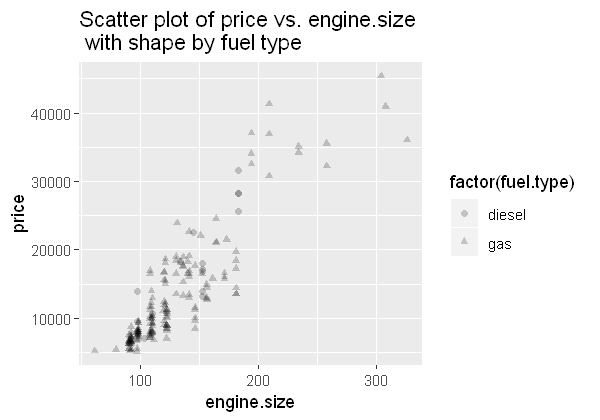

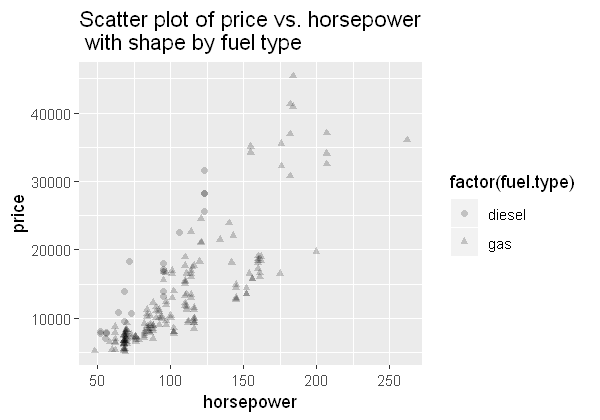

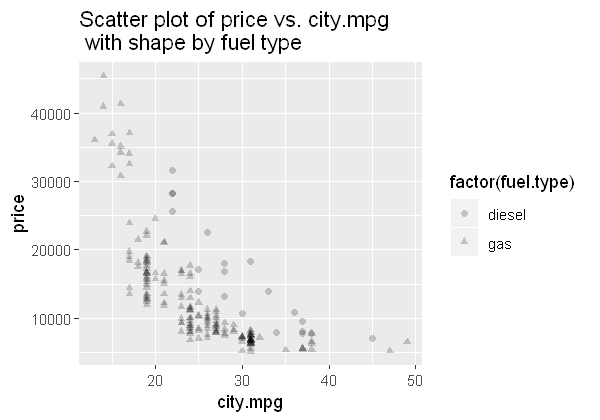

In [19]:
plot_scatter_sp = function(df, cols, col_y = 'price', alpha = 1.0){
    options(repr.plot.width=5, repr.plot.height=3.5) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(col, col_y)) + 
                   geom_point(aes(shape = factor(fuel.type)), alpha = alpha) +
                   ggtitle(paste('Scatter plot of', col_y, 'vs.', col, '\n with shape by fuel type'))
        print(p)
    }
}

plot_scatter_sp(auto_prices, numcols, alpha = 0.2)

While there is some overlap, the differences between gas and diesel autos are now apparent in these plots. This new view of the data helps to confirm and fuel type is a significant feature for determining auto price. 

Notice, that rather distinctive shapes have been chosen for this display. In summary, by adding shape by category a third dimension is projected onto these plots.

### Marker size

The code in the cell below uses marker size to display curb weight. Since ggplot2 uses area to compute  marker size, the values of curb weight are squared. The larger markers lead to more over-plotting, so lower alpha value is used. Execute this code and examine the results. 

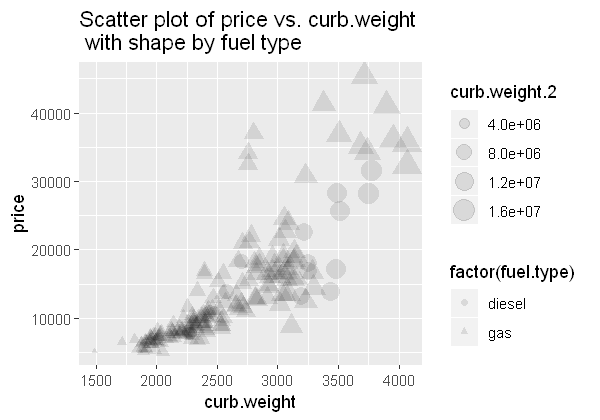

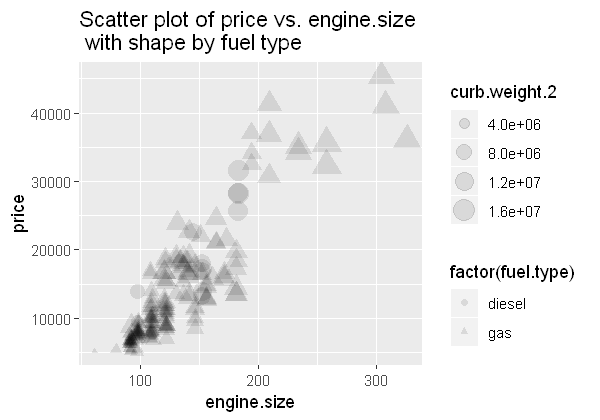

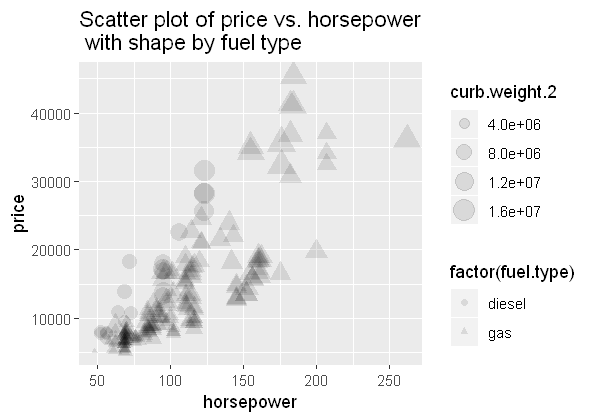

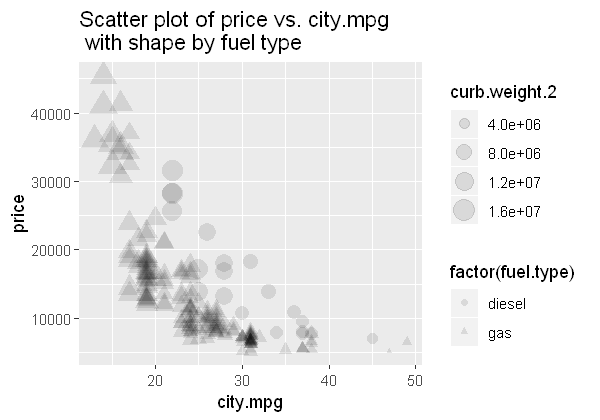

In [20]:
plot_scatter_sp_sz = function(df, cols, col_y = 'price', alpha = 1.0){
    options(repr.plot.width=5, repr.plot.height=3.5) # Set the initial plot area dimensions
    df$curb.weight.2 = df$curb.weight**2
    for(col in cols){
        p = ggplot(df, aes_string(col, col_y)) + 
                   geom_point(aes(shape = factor(fuel.type), size = curb.weight.2), alpha = alpha) +
                   ggtitle(paste('Scatter plot of', col_y, 'vs.', col, '\n with shape by fuel type'))
        print(p)
    }
}

plot_scatter_sp_sz(auto_prices, numcols, alpha = 0.1)

There are several interesting aspects of these plots, each of which is useful in predicting the price of autos For diesel autos the relationship between curb weight, price, engine size, horsepower and city MPG. On the other hand, it appears that high price, large engine, high horsepower, and low city MPG cars have large gas engines. 

The above plots are now projecting four dimensions on the 2d plot surface. 

### Color

As was already discussed, changes in color are  hard for many people to perceive. None the less, color is useful for projecting a limited number of categories of a variable. Choice of distinctive color helps this situation. 

The code in the cell below uses color to display the aspiration category of the auto. Execute this code and examine the results. 

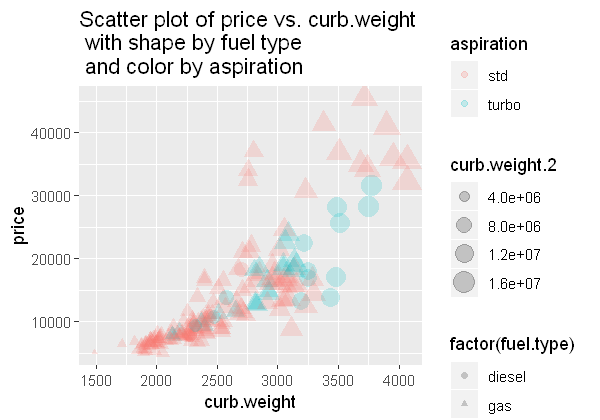

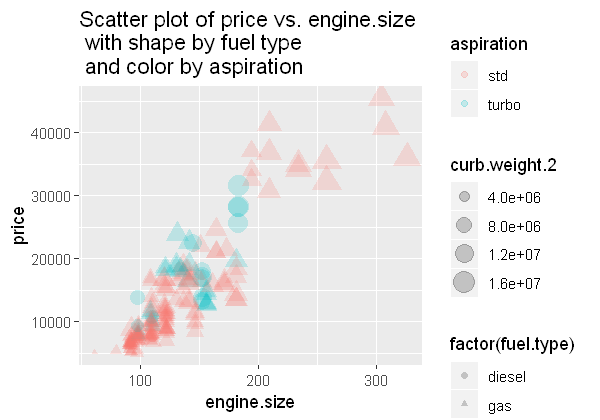

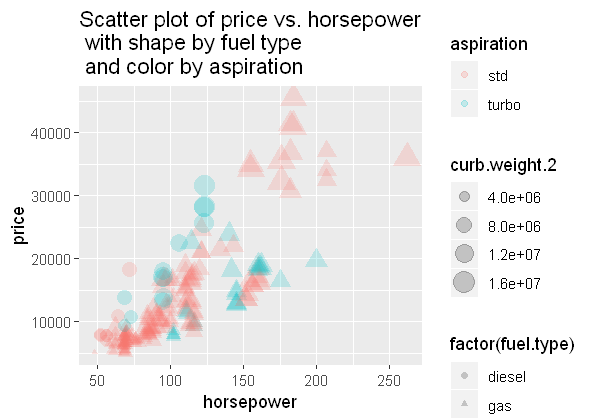

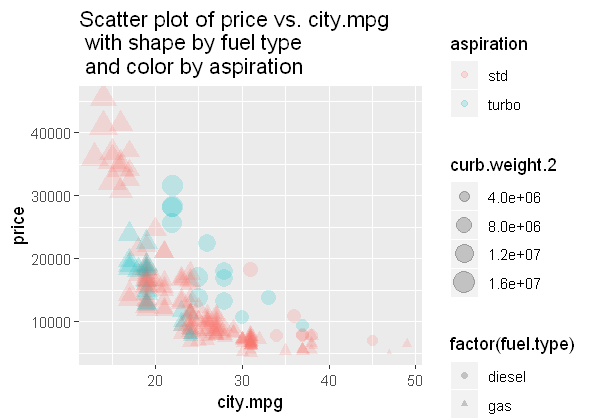

In [21]:
plot_scatter_sp_sz_cl = function(df, cols, col_y = 'price', alpha = 1.0){
    options(repr.plot.width=5, repr.plot.height=3.5) # Set the initial plot area dimensions
    df$curb.weight.2 = df$curb.weight**2
    for(col in cols){
        p = ggplot(df, aes_string(col, col_y)) + 
                   geom_point(aes(shape = factor(fuel.type), size = curb.weight.2, color = aspiration), 
                              alpha = alpha) +
                   ggtitle(paste('Scatter plot of', col_y, 'vs.', col, 
                                 '\n with shape by fuel type',
                                 '\n and color by aspiration'))
        print(p)
    }
}

plot_scatter_sp_sz_cl(auto_prices, numcols, alpha = 0.2)

Each of these plots projects five dimensions of data onto the 2d display. Several relationship are now apparent in these data:

In summary, aspiration along with fuel type should be useful predictors of price. 

Now, answer **Question 3** on the course page.

Color (or hue) can be used in other types of plots. For example, the code in the cell below displays violin plots with color set by aspiration type. Execute this code and examine the results.

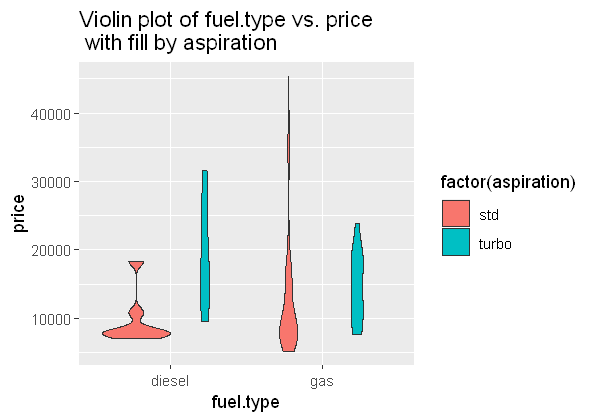

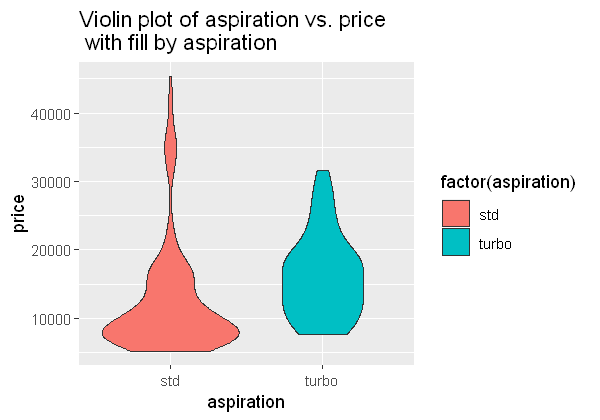

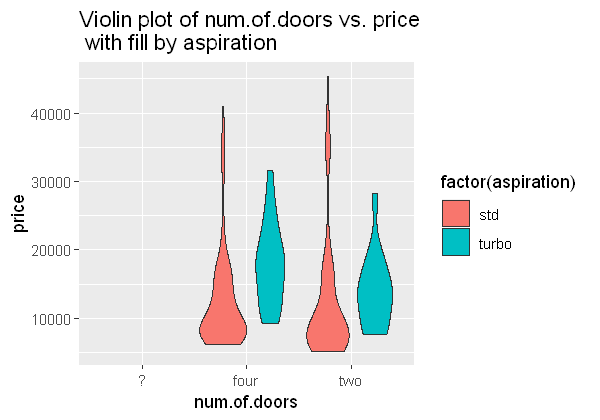

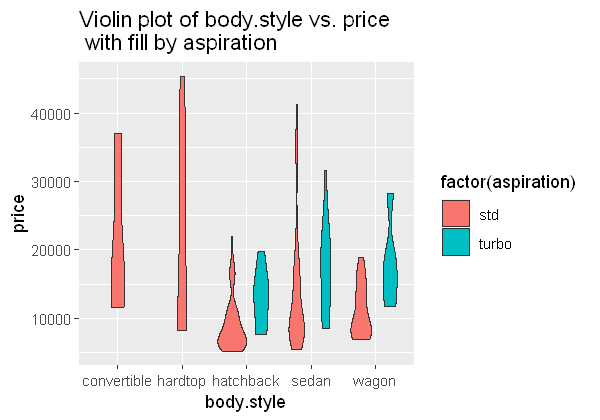

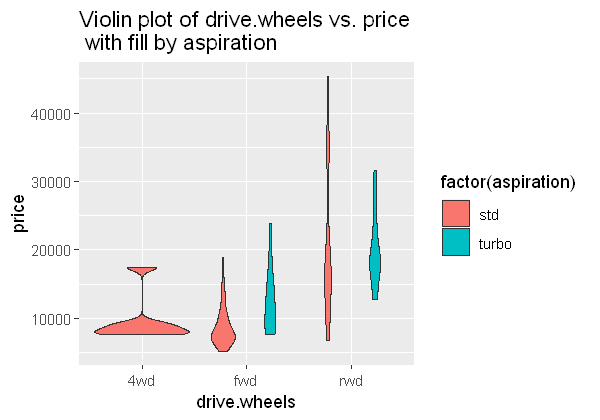

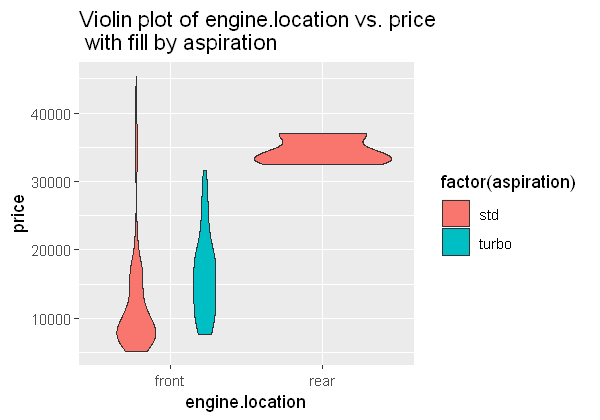

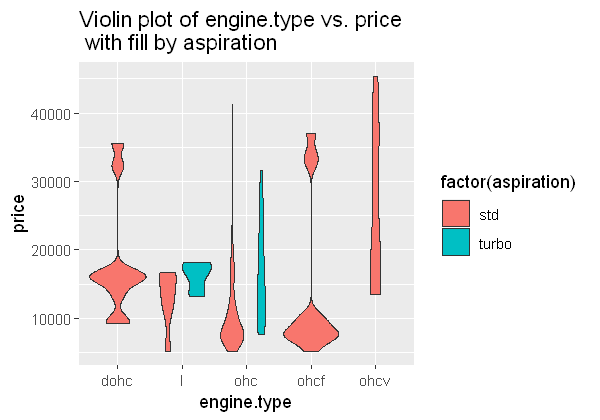

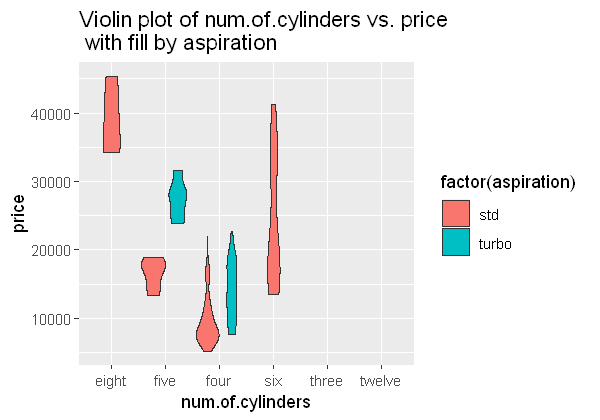

In [22]:
plot_violin = function(df, cols, col_y = 'price', bins = 30){
    options(repr.plot.width=5, repr.plot.height=3.5) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(col, col_y)) + 
                   geom_violin(aes(fill = factor(aspiration))) +
                   ggtitle(paste('Violin plot of', col, 'vs.', col_y, 
                                 '\n with fill by aspiration'))
        print(p)
    }
}

plot_violin(auto_prices, cat_cols)  

These plots show that autos with turbo aspiration are generally more expensive than the comparable standard car. Thus, aspiration should be a useful predictor of price. 

## Multi-axis views of data

Up to now, you have been working with plots with a single pair of axes. However, it is quite possible to create powerful data visualizations with multiple axes. These methods allows you to examine the relationships between many variables in one view. These multiple views aid in understanding of the many relationships in complex datasets. There are a number of powerful multi-axes plot methods. In this lab you will work with two commonly applied methods:
1. **Pair-wise scatter plots** or **scatter plot matrices** are an array of scatter plots with common axes along the rows and columns of the array. The diagonal of the array can be used to display distribution plots. The cells above or below the diagonal can be used for other plot types like contour density plots.
2. **Conditioned plots**, **faceted plots** or **small multiple plots** use **group-by** operations to create and display subsets of the dataset. The display can be a one or two dimensional array organized by the groupings of the dataset. 


### Pair-wise scatter plot

You will now apply a scatter plot matrix to the auto.price dataset. The code in the cell below uses the `ggpairs` function from the GGally package. This function creates a basic scatter plot matrix below the diagonal. Kernel density estimates of each variable are displayed on the diagonal. 2d density plots are displayed above the diagonal. Run the cell below to create a scatter plot matrix of the numeric features in the dataset.


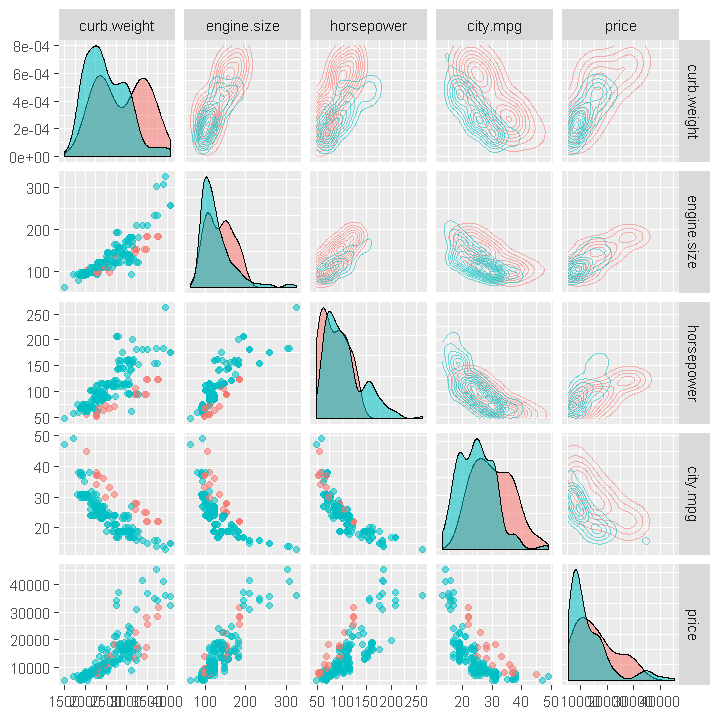

In [23]:
numcols = c('curb.weight', 'engine.size', 'horsepower', 'city.mpg', 'price')
options(repr.plot.width=6, repr.plot.height=6) # Set the initial plot area dimensions
ggpairs(auto_prices,
      columns = numcols,
      aes(color = fuel.type, alpha = 0.1),
      lower = list(continuous = 'points'),
      upper = list(continuous = ggally_density))

Review the scatter ploy matrix (if the plot is too large for the cell, you can expand the cell by clicking its left margin).

Note that this plot is comprised of a number of scatter plots. For each variable there is both a row and a column. The variable is plotted on the vertical axis in the row, and on the horizontal axis in the column. In this way, every combination of cross plots for all variables is displayed in both possible orientations. KDE plots for each variable are on the diagonal. Above the diagonal you can see contour plots of 2d density estimates. There is a lot of detail here. 

Examine the above scatter plot matrix, which shows plots of each numeric column verses every other numeric column, and note the following: 
- Many features show significant collinearity, such as horsepower, engine size and curb weight. This suggests that all of these features should not be used when training a machine learning model.
- All of the features show a strong relationship with the label, price, such as city.mpg, engine.size, horsepower and curb.weight.
- Several of these relationships are nonlinear, particularly the relationships with the city MPG feature.
- There is distinctively different behavior for the diesel vs. gas cars. 
- Most of the variables have asymmetric distributions.

Many of these relationships have been noted earlier. Having all this information on one plot can be useful. However, you may notice that some details are hard to see in such a display. 

**** 
Note: The number of scatter plots and the memory required to compute and display them can be a bit daunting. You may wish to make a scatter plot matrix with fewer columns. For example, you can eliminate columns which are collinear with other columns. 
****

### Conditioned plots

Now you will explore the use of conditioned plots. The code in the cell below uses the ggplot `facet_grid` function to define the rows and columns of the grid. This function uses the R modeling language to define the rows and columns of the plot array as follows:

$$row\ variables \sim column\ variables$$

If you only wish to display columns the formula simplifies to:

$$. \sim column\ variables$$

Or, for only rows the formula looks like:

$$row\ variables \sim .$$

Execute the code and examine the results.

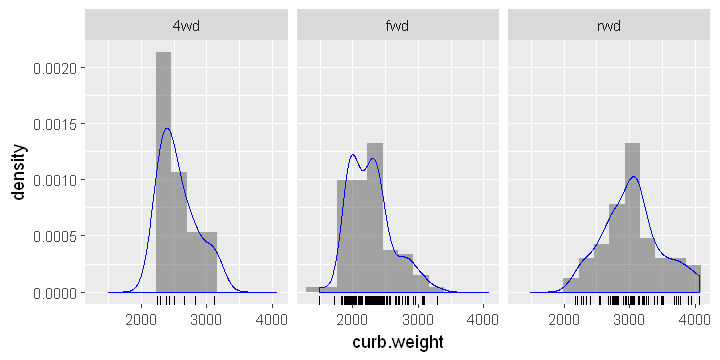

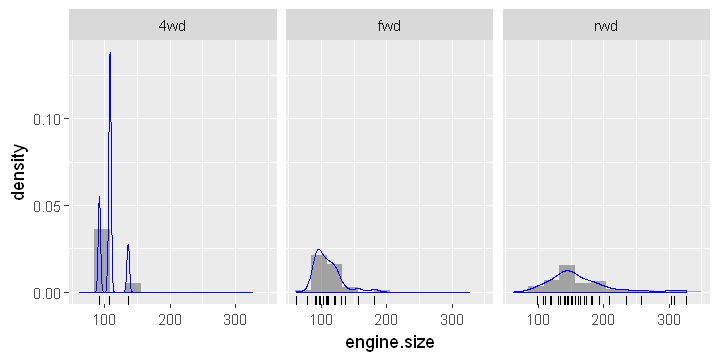

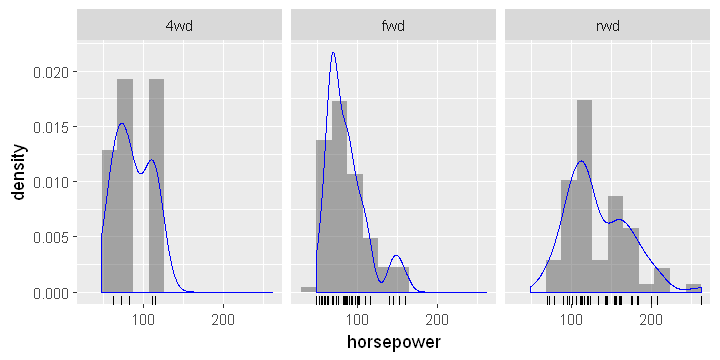

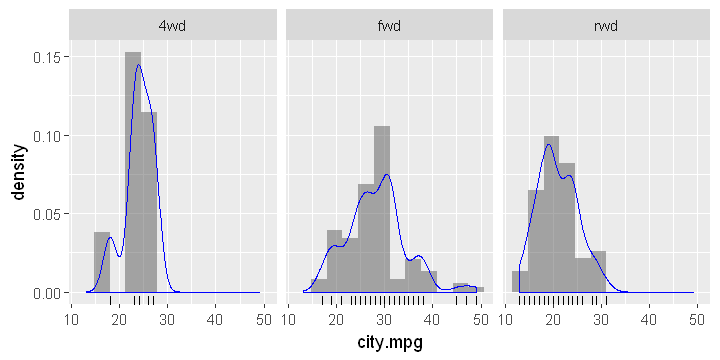

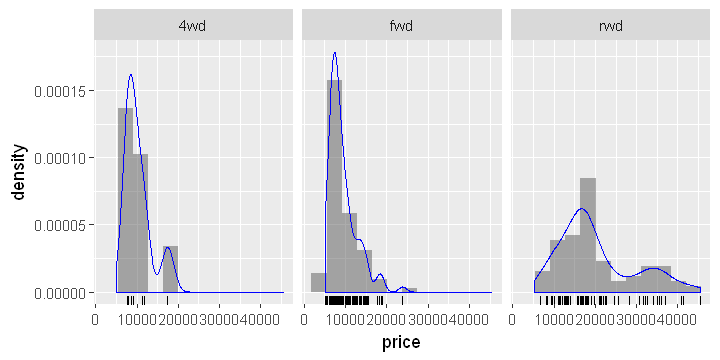

In [24]:
plot_hist_grid = function(df, numcols, bins = 10){
    options(repr.plot.width=6, repr.plot.height=3) # Set the initial plot area dimensions
    for(col in numcols){
        if(is.numeric(df[,col])){
            bw = (max(df[,col]) - min(df[,col]))/(bins + 1)
            p = ggplot(df, aes_string(col)) + 
                       geom_histogram(binwidth = bw, aes(y=..density..), alpha = 0.5) +
                       geom_density(aes(y=..density..), color = 'blue') + 
                       geom_rug() +
                       facet_grid(. ~ drive.wheels)
            print(p)
        }
    }
}

plot_hist_grid(auto_prices, numcols)    

Examine this series of conditioned plots. There is a consistent difference in the distributions of the numeric features conditioned on the categories of drive_wheels.

Now, answer **Question 4** on the course page.
 

Next you will create and examine conditioned scatter plots. By conditioning multiple dimensions, you can project several additional dimensions onto the two-dimensional plot. The conditioning can be thought of as a group-by operation.

You will not use point shape as a differentiator in this exercise, but keep in mind that shape can be as useful as color. Additionally, shape may be easier for the significant fraction of the population who are color blind. 

Note: Be careful when combining methods for projecting multiple dimensions. You can easily end up with a plot that is not only hard to interpret, but even harder for you to communicate your observations to your colleagues. For example, if you use three conditioning variables, plus color and shape, you are projecting seven dimensions of your dataset. While this approach might reveal important relationships, it may just create a complex plot. 

The code in the cell below uses the `facet_grid` function to create an array of plots grouped by drive wheels and body style. Execute this code and examine the results.

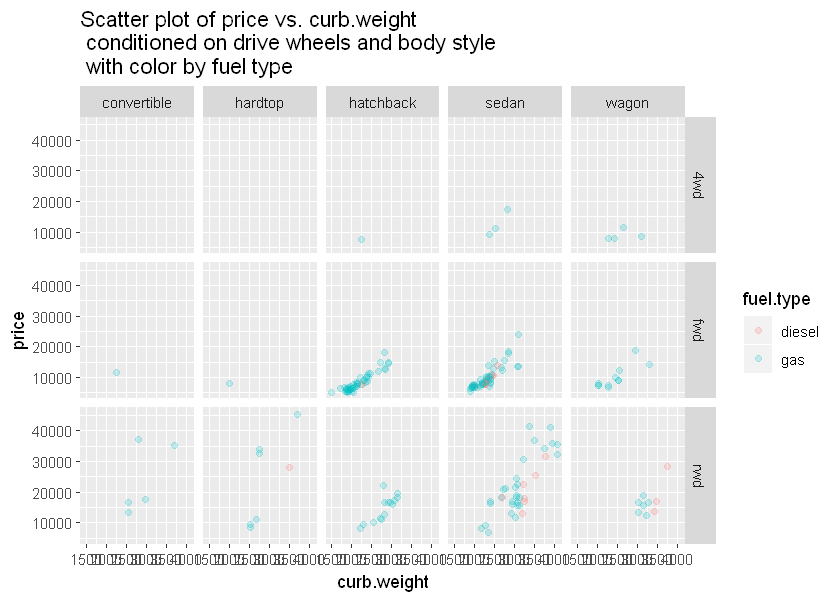

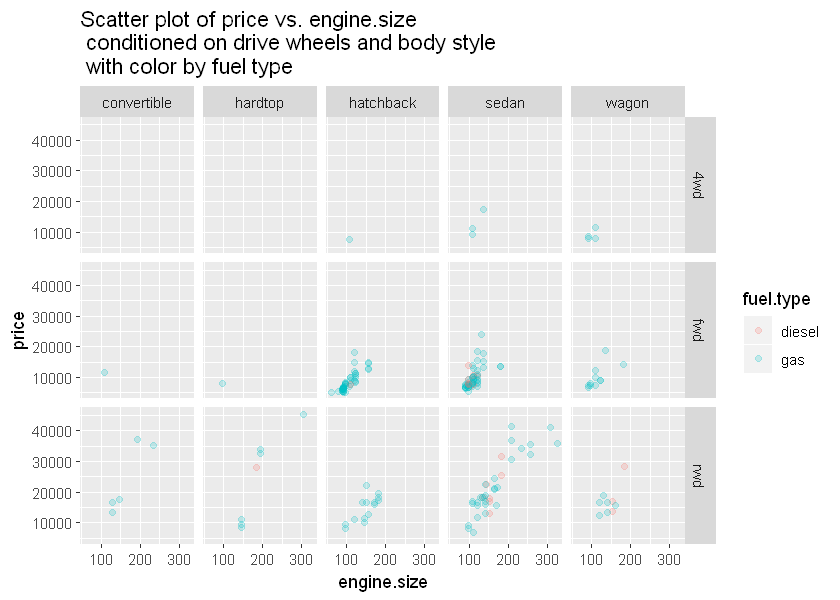

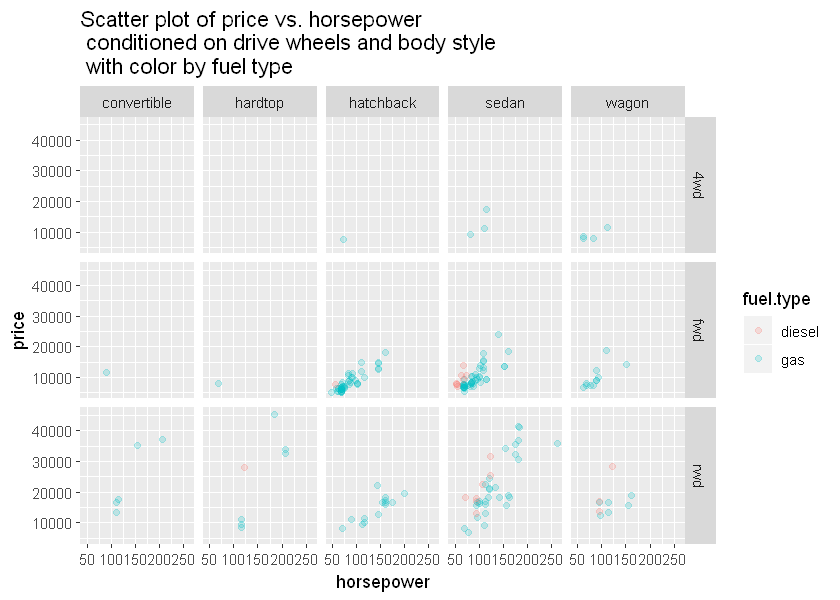

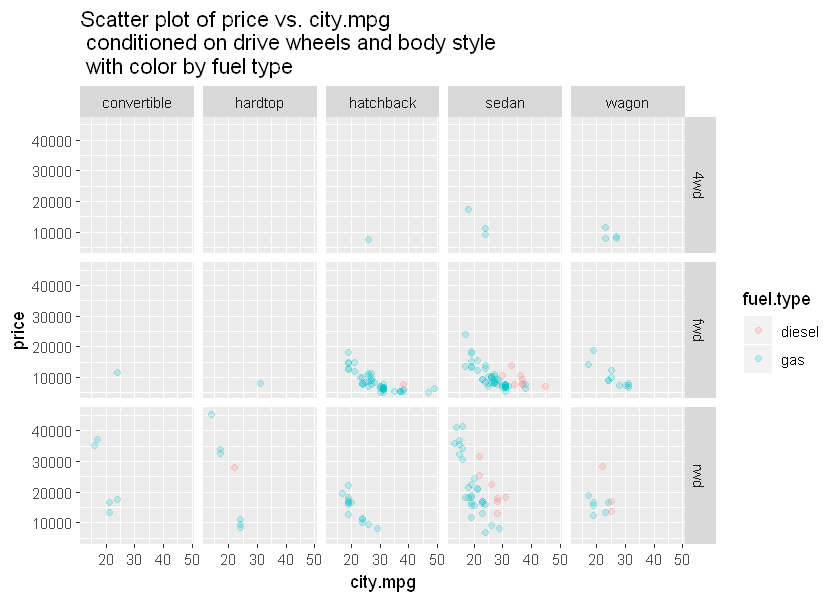

In [25]:
plot_scatter_grid = function(df, cols, col_y = 'price', alpha = 1.0){
    options(repr.plot.width=7, repr.plot.height=5) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(col, col_y)) + 
                   geom_point(aes(color = fuel.type), alpha = alpha) +
                   ggtitle(paste('Scatter plot of', col_y, 'vs.', col, 
                                 '\n conditioned on drive wheels and body style',
                                 '\n with color by fuel type')) +
                   facet_grid(drive.wheels ~ body.style)
        print(p)
    }
}

numcols = c('curb.weight', 'engine.size', 'horsepower', 'city.mpg')
plot_scatter_grid(auto_prices, numcols, alpha = 0.2)

Carefully examine the plots you have created. These plots show a total of five dimensions of the data and there is a lot of detail to understand. Generally, you should be able to conclude the following:
- There are no cars at all for some combinations of conditioning variables. For example, there are no 4 wheel drive convertibles or hardtops. As a result these plots are blank. 
- There are no diesel cars for some of the conditioning combinations, such as convertibles and 4 wheel drive cars. 
- There are a number of distinct groupings. For example, front wheel drive and rear wheel drive sedans or wagons have distinctly different behaviors.   

Again, many of these observations can be made with other types of plots. However, there is an advantage of laying these plots out in sub-groups of the datasets. Different sub-groupings of the data highlight different relationships of the data.

Finally, answer **Question 5** on the course page.

## Summary

By now, you should realize that exploring a dataset in detail is an open-ended and complex task. You may wish to try other combinations of conditioning variables, and color variable, to find some other interesting relationships in these data. Only by using multiple views with different plot types can you truly develop an understanding of relationships in complex data.

A constant challenge in visualizing complex datasets is the limitation of 2d projections. Aesthetics and multiple axis methods allow projection of higher dimensions onto the 2d plot surface. 

Specifically in this lab you:

1. Used summary statistics to understand the basics of a data set.
2. Used several types of plots to display distributions.
3. Created scatter plots with different transparency. 
4. Used density plots and hex bin plots to overcome over-plotting. 
5. Applied aesthetics to project additional dimensions of categorical and numeric variables onto a 2d plot surface. 
6. Used pair-wise scatter plots and conditioned plots to create displays with multiple axes. 